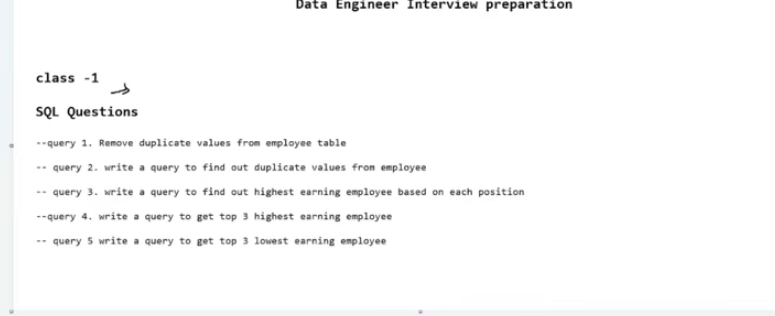

# question 1 to 5

In [ ]:
--- practice questions and answers

CREATE TABLE Employee2 (
    employee_id INT ,
    employee_name VARCHAR(50),
    department_id INT,
    position VARCHAR(50),
    salary DECIMAL(10, 2)
);


INSERT INTO Employee2 (employee_id, employee_name, department_id, position, salary)
VALUES 
(1, 'Alice Johnson', 101, 'Software Engineer', 70000),
(2, 'Bob Smith', 102, 'Data Scientist', 80000),
(3, 'Carol White', 103, 'Project Manager', 75000),
(4, 'David Brown', 104, 'Quality Assurance', 60000),
(5, 'Eva Green', 105, 'HR Specialist', 55000),
(6, 'Frank Martin', 101, 'Software Engineer', 70000),
(3, 'Carol White', 103, 'Project Manager', 75000),
(4, 'David Brown', 104, 'Quality Assurance', 60000)

select * from employee2

-- 1. remove duplicate values from empl table
select distinct * from Employee2;

-- 2. write a query to find out duplicate values from employee
with cte2 as(
    select *,row_number() over(partition by employee_id order by employee_id) as rn
from Employee2
)

select * from cte2 where rn =2;

-- 3. write a query to find out highest earning employee based 
-- on each position
select * from employee2;

with cte1 as(
select *, row_number() over(partition by position 
order by salary desc) as d_rnk from Employee2)
select * from cte1 where d_rnk = 1
order by employee_id;

select max(salary),position from Employee2
group by position;

-- 4. top 3 hihest earning employee
select  distinct top 3 * from Employee2 
order by salary desc

-- 5.query to get top 3 lowest earning employee
select  distinct top 3 * from Employee2 
order by salary asc;


In [ ]:
CREATE TABLE Emp (
    employee_id INT PRIMARY KEY,
    employee_name VARCHAR(50),
    department VARCHAR(50),
    salary DECIMAL(10, 2),
    location VARCHAR(50)
);

INSERT INTO Emp (employee_id, employee_name, department, salary, location)
VALUES 
(1, 'Alice Johnson', 'Engineering', 75000, 'New York'),
(2, 'Bob Smith', 'Data Science', 85000, 'San Francisco'),
(3, 'Carol White', 'Human Resources', 65000, 'Chicago'),
(4, 'David Brown', 'Engineering', 78000, 'Austin'),
(5, 'Eva Green', 'Marketing', 70000, 'Seattle'),
(6, 'Frank Martin', 'Data Science', 82000, 'New York'),
(7, 'Grace Lee', 'Finance', 90000, 'Los Angeles'),
(8, 'Harry Clark', 'Sales', 72000, 'Chicago'),
(9, 'Ivy Baker', 'Human Resources', 67000, 'Austin'),
(10, 'Jack Wilson', 'Marketing', 71000, 'San Francisco'),
(11, 'Karen Evans', 'Engineering', 76000, 'Seattle'),
(12, 'Leo Adams', 'Data Science', 84000, 'New York'),
(13, 'Mona Scott', 'Finance', 88000, 'Los Angeles'),
(14, 'Nate Perry', 'Sales', 74000, 'Chicago'),
(15, 'Olivia Cooper', 'Engineering', 78000, 'Austin');

select *from emp

--query 5 write a query to find out 2nd highest salary employee

with cte as(
select * , row_number() over(order by salary desc) rn from emp
)
select * from cte where rn=3

--query 6 write a query to get 2nd lowest earning employee 
with cte as(
select * , row_number() over(order by salary asc) rn from emp
)
select * from cte where rn=2

--query 7 write a query to get 2nd highest salary based on each department 

with cte as(
select * , row_number() over(partition by department order by salary desc) as rn from emp
)
select * from cte where rn=2

--query 8 write query to get 3rd lowest salary based on each location 
with cte as(
select * , row_number() over(partition by location order by salary asc) as rn from emp
)
select * from cte where rn=3
--query 9 write a query to get bottom 2 salary based on each location 

with cte as(
select * ,row_number() over(partition by location order by salary asc) as rn from emp
)
select * from cte where rn in (1,2)

--query 10 write a query to get top 2 salary based on each department 

with cte as(
select * ,row_number() over(partition by location order by salary desc) rn from emp
)
select * from cte where rn in (1,2)
